<a href="https://colab.research.google.com/github/sameekshya1999/NextWordPrediction/blob/main/Bidirectional_nextword.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,  Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [2]:
#Step 2: Load your file
from google.colab import files
uploaded = files.upload()

Saving cinderella.txt to cinderella.txt


In [3]:
#Step 3: Open and pre-process the data
file = open("cinderella.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:100]

'Cinderella: A Tale of Hope and Kindness Once upon a time, in a faraway land, there was a kind and ge'

In [4]:
len(data)

5704

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[6, 7, 131, 11, 132, 3, 67, 133, 134, 7, 68, 9, 7, 135, 136]

In [6]:
len(sequence_data)

972

In [7]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

379


In [8]:
sequences = []
for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  969


array([[  6,   7, 131,  11],
       [  7, 131,  11, 132],
       [131,  11, 132,   3],
       [ 11, 132,   3,  67],
       [132,   3,  67, 133],
       [  3,  67, 133, 134],
       [ 67, 133, 134,   7],
       [133, 134,   7,  68],
       [134,   7,  68,   9],
       [  7,  68,   9,   7]])

In [9]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[  6   7 131]
 [  7 131  11]
 [131  11 132]
 [ 11 132   3]
 [132   3  67]
 [  3  67 133]
 [ 67 133 134]
 [133 134   7]
 [134   7  68]
 [  7  68   9]]
Response:  [ 11 132   3  67 133 134   7  68   9   7]


In [11]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
# Split your data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=30)

In [16]:
#Bidirectional LSTM
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
Bi_model = Sequential()  # Create a Sequential model
Bi_model.add(Input(shape=(3, )))  # Define input shape here

Bi_model.add(Embedding(vocab_size, 10))
Bi_model.add(Bidirectional(LSTM(1000, return_sequences=True)))   # Add a Bidirectional LSTM layer with 1000 units
Bi_model.add(Dropout(0.2))
Bi_model.add(Bidirectional(LSTM(1000)))     # Add another Bidirectional LSTM layer with 1000 units
Bi_model.add(Dropout(0.2))
Bi_model.add(Dense(1000, activation="relu"))    # Add a Dense layer with 1000 units and ReLU activation
Bi_model.add(Dense(vocab_size, activation="softmax"))    # Add the output Dense layer with vocab_size units and softmax activation
Bi_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 3, 10)               │           3,790 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 3, 2000)             │       8,088,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 2000)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 2000)                │      24,008,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │       2,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 379)                 │         379,379 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,480,169 (131.53 MB)

 Trainable params: 34,480,169 (131.53 MB)

 Non-trainable params: 0 (0.00 B)

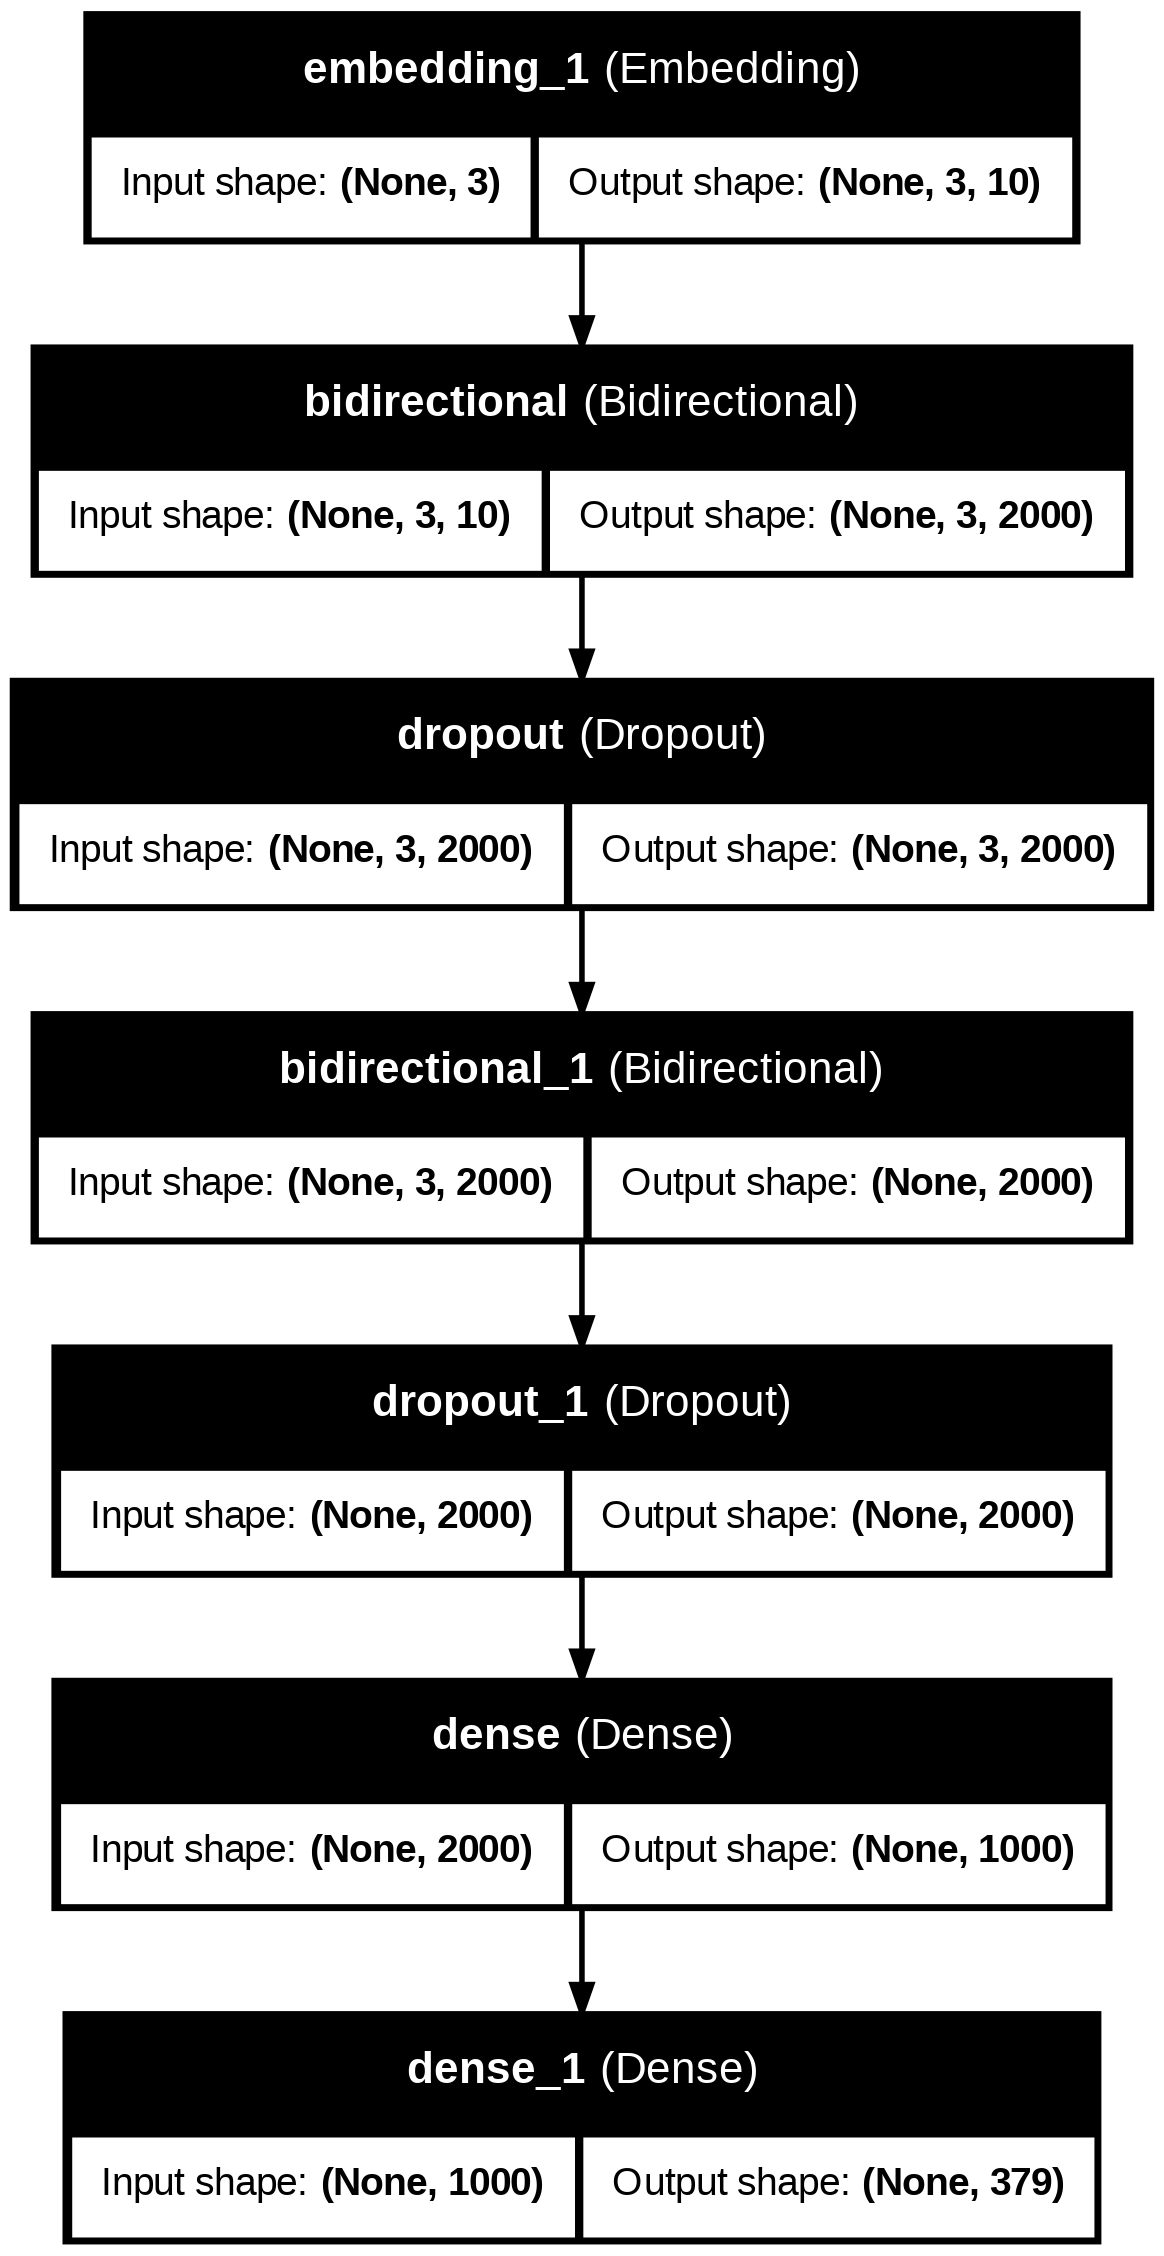

In [20]:
# Assuming your Bi_model has a sequence length of 512

from tensorflow.keras.utils import plot_model
plot_model(Bi_model, to_file='plot2.png', show_layer_names=True, show_shapes=True)


In [23]:
# Bidirectional LSTM
checkpoint = ModelCheckpoint("next_words_bi_lstm.keras", monitor='loss', verbose=1, save_best_only=True)

# Compile the Bidirectional LSTM model
Bi_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the Bidirectional LSTM model (replace X_train and y_train with your data)
Bi_model.fit(X_train, y_train, epochs=40, batch_size=50, callbacks=[checkpoint])

Epoch 1/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6902 - loss: 0.9663
Epoch 1: loss improved from inf to 1.09446, saving model to next_words_bi_lstm.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 236ms/step - accuracy: 0.6879 - loss: 0.9734
Epoch 2/40
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8471 - loss: 0.5428
Epoch 2: loss improved from 1.09446 to 0.63723, saving model to next_words_bi_lstm.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 538ms/step - accuracy: 0.8424 - loss: 0.5533
Epoch 3/40
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8399 - loss: 0.4748
Epoch 3: loss improved from 0.63723 to 0.47888, saving model to next_words_bi_lstm.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 245ms/step - accuracy: 0.8406 - loss: 0.4752
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8870 - loss: 0.3473
Epoch 4: loss improved from 0.47888 to 0.42174, saving model to next_words_bi_lstm.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 439ms/step - accuracy: 0.8855 - loss: 0.3514
Epoch 5

In [24]:

# Load the Bidirectional LSTM model from the checkpoint
bi_model = load_model("next_words_bi_lstm.keras")

# Evaluate the Bidirectional LSTM model on the test data
bi_test_loss, bi_test_accuracy = bi_model.evaluate(X_test, y_test)

# Print the test accuracy for the Bidirectional LSTM model
print("Bidirectional LSTM Test Accuracy:", bi_test_accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0631 - loss: 42.8579 
Bidirectional LSTM Test Accuracy: 0.06164383515715599


In [27]:
# Load the model and tokenizer
model = load_model('next_words.keras')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break

  print(predicted_word)
  return predicted_word

In [ ]:
while(True):
  text = input("Enter your line: ")

  if text == "0":
      print("Execution completed.....")
      break

  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)

          Predict_Next_Words(model, tokenizer, text)

      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: everyone was captivated by her
['captivated', 'by', 'her']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
beauty
Enter your line:  who didn’t recognize her in her magical
['in', 'her', 'magical']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
dress
Enter your line: She reached her
['She', 'reached', 'her']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
carriage
